In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib.pyplot as plt
import time
from datetime import datetime
from dateutil.parser import parse
from astropy.time import Time

In [3]:
marker1=['.','*','+','x','v','^','<','>','1','2','3','4','8','p','P','h','H','X','D','d','|','_']
color1=['lightblue','blue','red','sandybrown','tan','gold','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','aqua','purple','magenta','yellow','lime','turquoise','lightcyan','teal','indigo']

In [4]:
def get_namelist(df,name):
    state=df[name]
    stateori=[]
    for i in state:
        if i not in stateori:
            stateori.append(i)
    return stateori

In [15]:
radiomrk1018=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/excel—information/vla_archival_survey.xlsx',sheet_name='Sheet2')
filename=radiomrk1018
#parax1=filename.columns[0]
#parax2=filename.columns[1]
parax='meanepoch'
paraxerr='terr'
parax1='Datestart'
parax2='Datestop'
paray='Fint(mJy)'
parayerr='rms'
paralist='band'
namelistall=get_namelist(filename,paralist)
print(len(namelistall))
print(namelistall)
print(parax1,parax2)
t1=np.array(pd.to_datetime(filename[parax1]),dtype='datetime64[D]')
t2=np.array(pd.to_datetime(filename[parax2]),dtype='datetime64[D]')

tmean=t1+(t2-t1)/2
terr=(t2-t1)/2
filename['meanepoch']=tmean
filename['terr']=terr
namelist=['L', 'C', 'X', 'K',]
print(namelist)

6
[nan, 'L', 'C', 'X', 'K', 'C,S']
Datestart Datestop
['L', 'C', 'X', 'K']


['L', 'C', 'X', 'K']


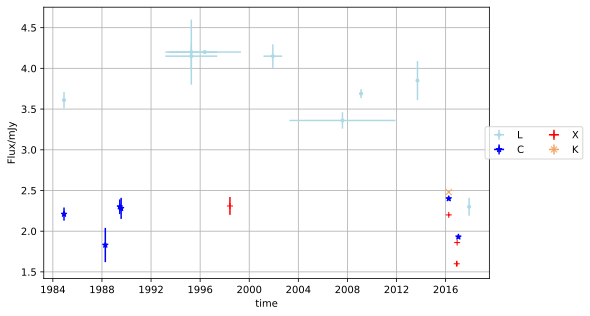

In [16]:
plt.figure(figsize=(8,5))
namelist=['L', 'C', 'X', 'K',]
print(namelist)
for i,m,c, in zip(namelist,marker1[:len(namelist)],color1[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    xerr=filename[filename[paralist]==i][paraxerr]
    y=filename[filename[paralist]==i][paray]
    yerr=filename[filename[paralist]==i][parayerr]
    plt.errorbar(x,y,xerr=xerr,yerr=yerr,marker=m,color=c,label=i,fmt='o')
    #print(x,i)
    
plt.xlabel('time')
plt.ylabel('Flux/mJy')
#plt.title('radioflux')
#plt.legend()
#plt.xlim(1980,2019)
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5),ncol=2)
plt.grid()
plt.show()